In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
from pandas import DataFrame

In [75]:
df_data = pd.read_csv('D:/Downloads/parkinsons.csv')

In [76]:
df_data = df_data.drop(['name'], axis=1)

In [77]:
X = df_data.copy()

In [78]:
y = df_data['status']
X = X.drop(['status'], axis=1)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [82]:
lr = LogisticRegression(solver='lbfgs', penalty='none', max_iter=1000)

In [83]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty='none')

In [84]:
print('accuracy score: %s' % lr.score(X_test, y_test))

accuracy score: 0.7959183673469388


In [87]:
lr2 = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=1000)

In [88]:
lr2.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [89]:
print('accuracy score: %s' % lr2.score(X_test, y_test))

accuracy score: 0.8367346938775511


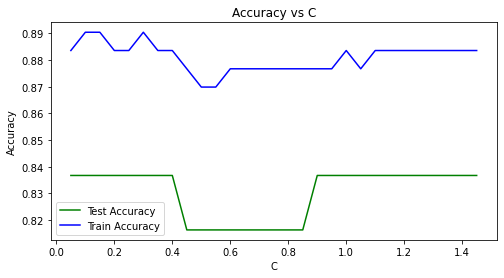

In [96]:
c_vals = np.arange(0.05, 1.5, 0.05)
test_accuracy = []
train_accuracy = []
for c in c_vals:
    lr3 = LogisticRegression(solver='lbfgs', penalty='l2', C=c, max_iter=1000)
    lr3.fit(X_train, y_train)
    test_accuracy.append(lr3.score(X_test, y_test))
    train_accuracy.append(lr3.score(X_train, y_train))
    
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_accuracy, '-g', label='Test Accuracy')
ax1.plot(c_vals, train_accuracy, '-b', label='Train Accuracy')
ax1.set(xlabel='C', ylabel='Accuracy')
ax1.set_title('Accuracy vs C')
ax1.legend()
plt.show()